### Phonon Unfolding and Projection (`puppy`)

1. example situation is a silver vacancy (*V*<sub>Ag</sub>) in AgI

In [1]:
%load_ext autoreload
%autoreload 2

You can use `DOPED` to find the vacancy site if probing vacancy phonons

`pip install doped`

In [3]:
from doped.analysis import defect_from_structures
from pymatgen.core import Structure 

vacancy= defect_from_structures(
    bulk_supercell=Structure.from_file('./AgI/v_Ag/host/SPOSCAR.gz'),
    defect_supercell=Structure.from_file('./AgI/v_Ag/defect/SPOSCAR.gz')
)
vacancy_index = vacancy.defect_site_index
vacancy_coords = vacancy.defect_site.coords

vacancy_index,vacancy_coords

(31, array([6.83911393, 1.31618809, 7.45983835]))

In [5]:
from puppy.unfolder import PhononUnfoldingandProjection as Puppy
import numpy as np 


directories = {'defect_directory':'./AgI/v_Ag/defect/',
               'host_directory':'./AgI/v_Ag/host/'}


puppy = Puppy(
    supercell_directory=directories['defect_directory'],
    host_directory=directories['host_directory'],
    line_density=100,
    defect_site_index=vacancy_index,
    defect_site_coords=vacancy_coords,
    nearest_neighbour_tolerance=4,
    matrix=np.array([[3, 0, 0], [0, 3, 0], [0, 0, 2]]),
)


puppy.get_defect_neighbour_sites() # shows what you are interested in around the defect

{'Ag': [], 'I': [66, 38, 39, 42]}

In [6]:
puppy.get_host_phonons(calculate_eigenvectors=False) 

dict interface is deprecated. Use attribute interface instead



In [7]:
puppy.get_defect_phonons(calculate_eigenvectors=True)

In [10]:
data = puppy.unfold()

unfolding phonons...: 100%|██████████| 9/9 [00:16<00:00,  1.81s/it]


In [9]:
puppy.eigenvectors_to_eigendisplacements()

generating_eigendisplacements...: 100%|██████████| 2/2 [00:03<00:00,  1.93s/it]


No data for colormapping provided via 'c'. Parameters 'norm' will be ignored



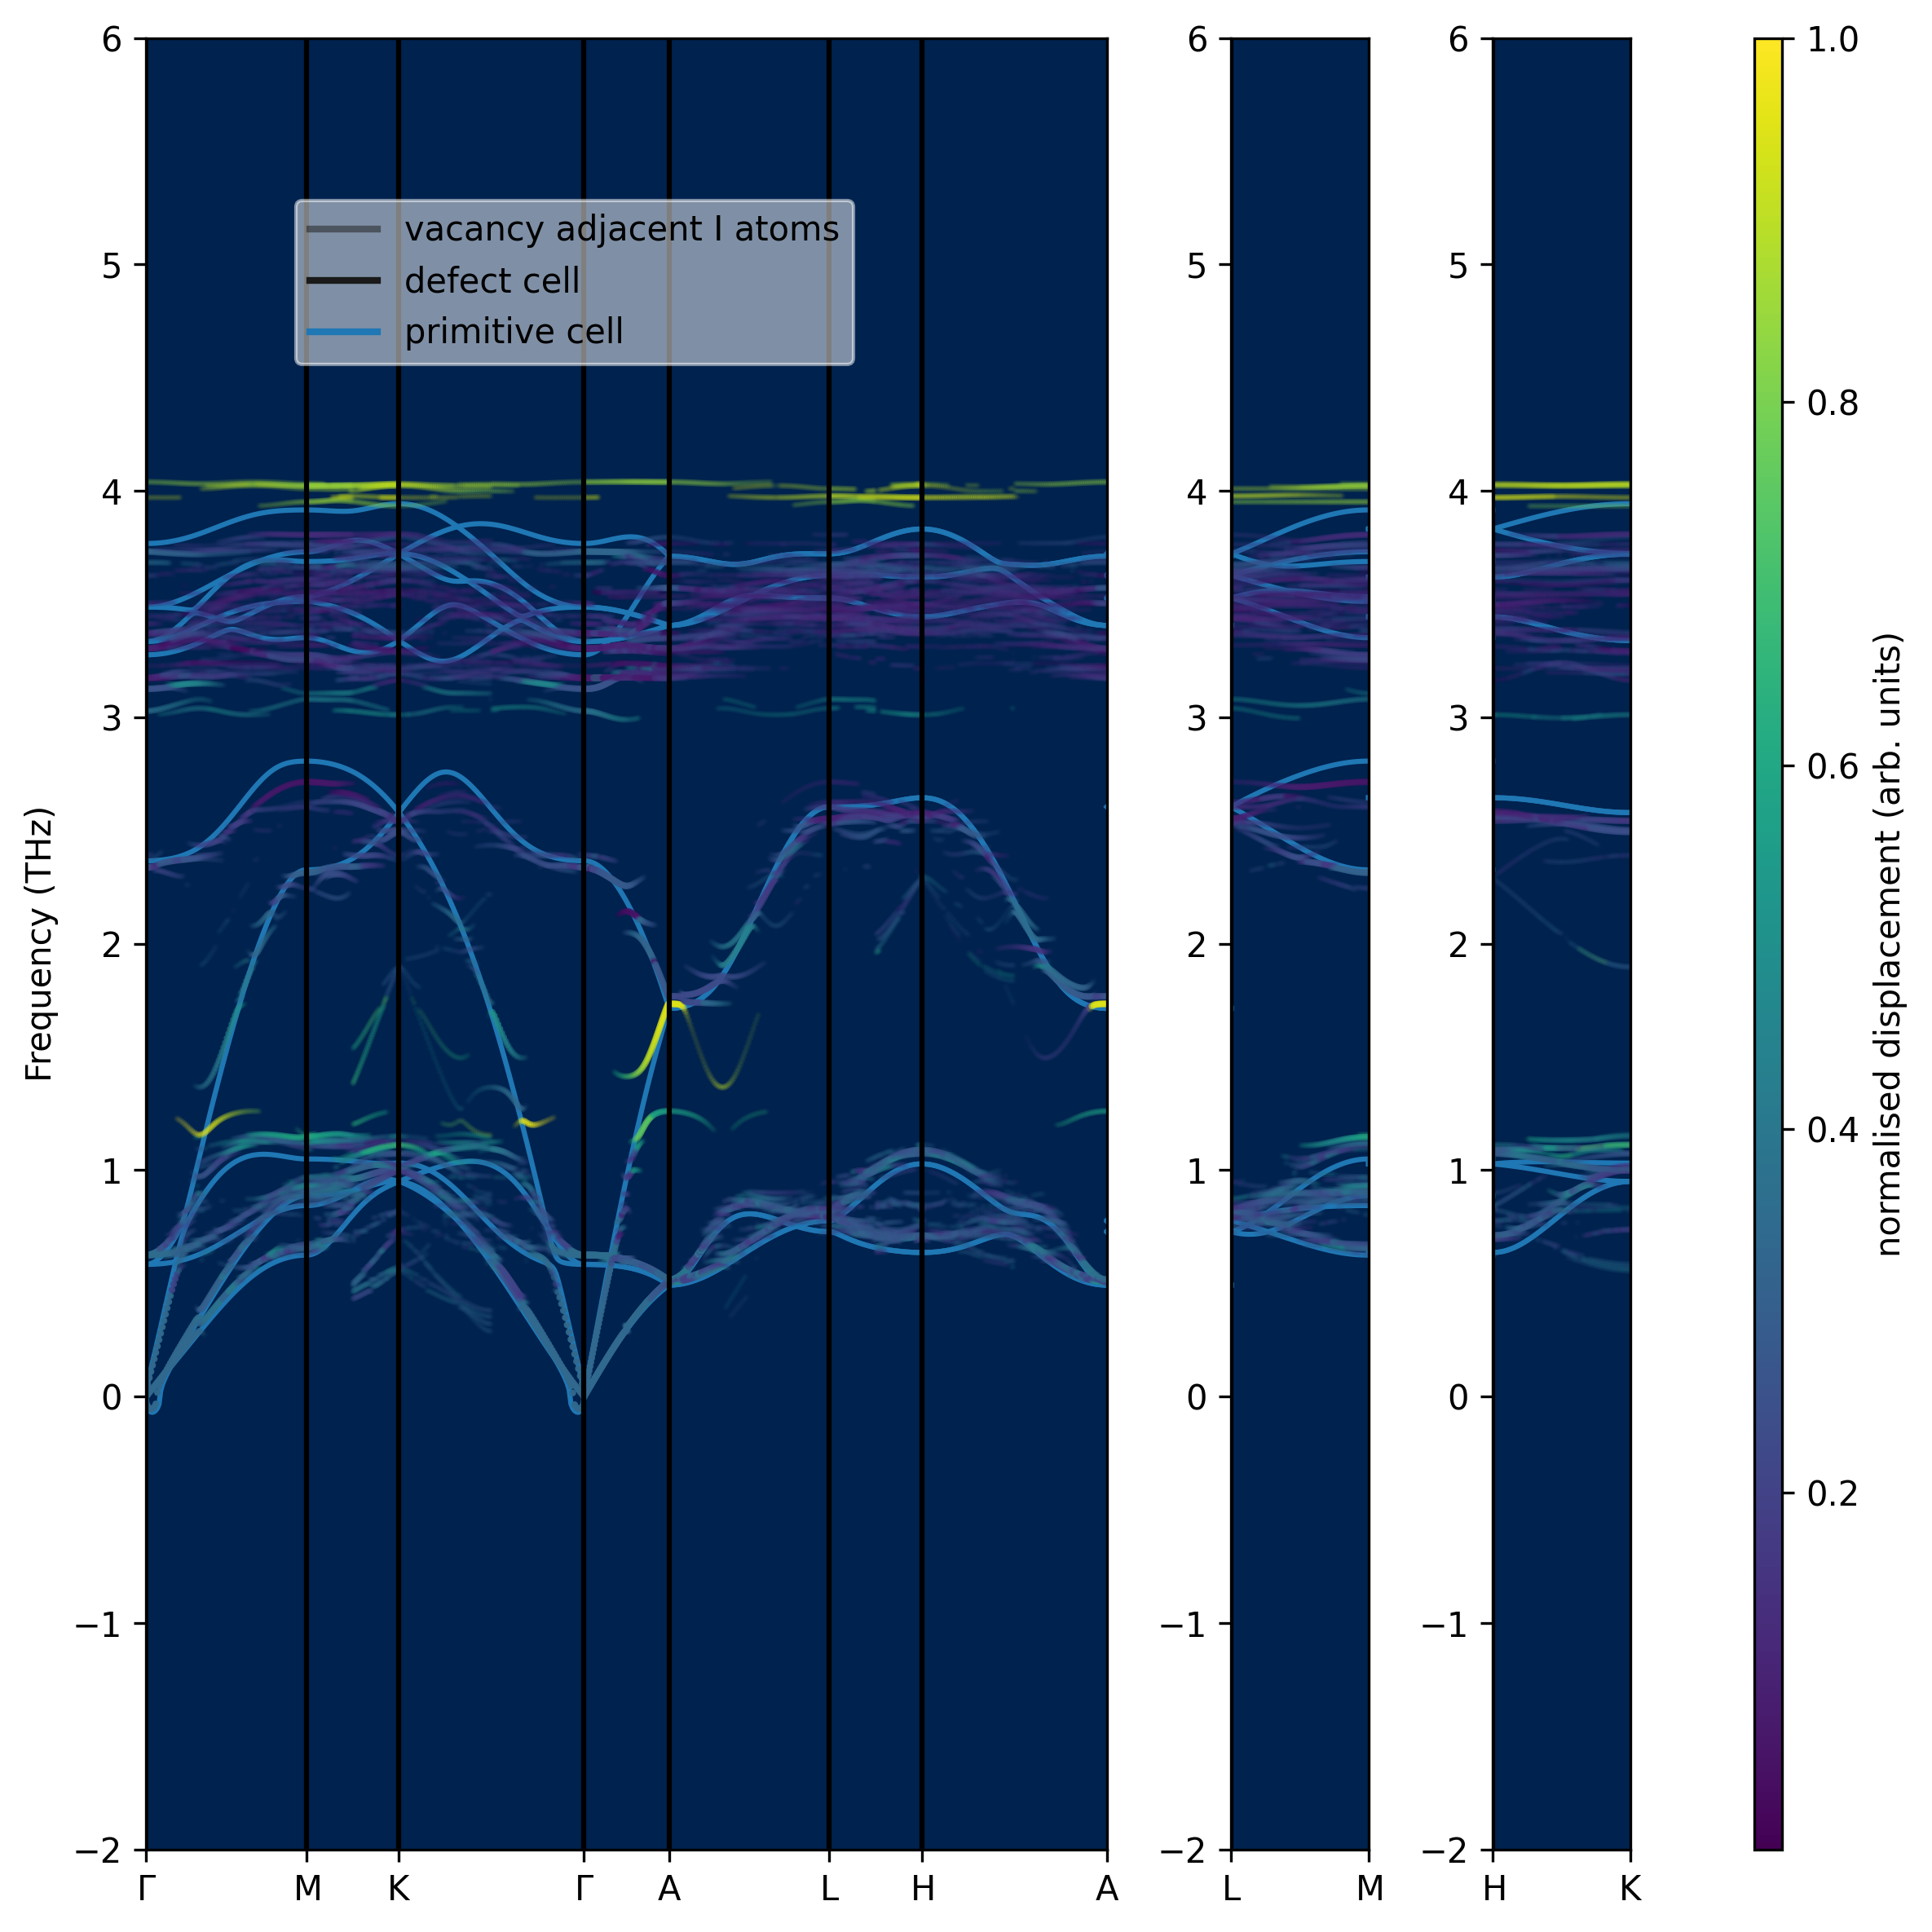

In [11]:
from puppy.plotting import PuppyPlotter 
import matplotlib as mpl 
cmap = 'cividis'
mpl.rcParams['pdf.fonttype'] = 42
comap = mpl.colormaps.get_cmap(cmap)
mpl.rcParams["axes.facecolor"] = comap.colors[0]

plot_kws={'s':1,'rasterized':True,'edgecolor':None,'linewidths':None}

legend_kws={'facecolor':'white',
                        'framealpha':0.5,
                        'edgecolor':'white',
                        'bbox_to_anchor':[0.3,0.9],
                        'loc':'upper center'}

pp =  PuppyPlotter(unfold_data=puppy.unfold_data)
fig,axes = pp.plot_unfold(
    with_prim=True,
    threshold=0.05,
    atom='I',
    plot_kws=plot_kws,
    legend_kws=legend_kws
)

In [12]:
fig.savefig('../static/unfolded.png')


1. CuAg solid solution 

In [425]:
from puppy.unfolder import PhononUnfoldingandProjection as Puppy
import numpy as np 


directories = {'solid_solution_directory':'./CuAg/solid_solution/',
               'host_directory':'./CuAg/host/'}


puppy = Puppy(
    supercell_directory=directories['solid_solution_directory'],
    host_directory=directories['host_directory'],
    defect_site_index=None,
    defect_site_coords=None,
    line_density=200,
    matrix=np.array([[2, 0, 0], [0, 2, 0], [0, 0, 2]]),
)

In [426]:
puppy.get_host_phonons(calculate_eigenvectors=False) 

/Users/badw/miniconda3/envs/py312/lib/python3.12/site-packages/seekpath/hpkot/__init__.py:172: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  conv_lattice = dataset["std_lattice"]


In [427]:
puppy.get_defect_phonons(calculate_eigenvectors=True)

In [428]:
data = puppy.unfold()

unfolding phonons...: 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]


In [429]:
Ags = puppy.get_all_atoms_of_a_specie('Ag')
Ags

{'Ag': [26, 27, 28, 29, 30, 31]}

In [430]:
puppy.eigenvectors_to_eigendisplacements(project_specific_sites=Ags)

generating_eigendisplacements...: 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]


In [431]:
weights = puppy.unfold_data['w'][0]
frequencies = puppy.unfold_data['f'][0]


np.shape(weights),np.shape(frequencies)

((200, 96), (200, 96))

/Users/badw/github-projects/puppy/src/puppy/plotting.py:150: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  axes[count].scatter(x=qq,


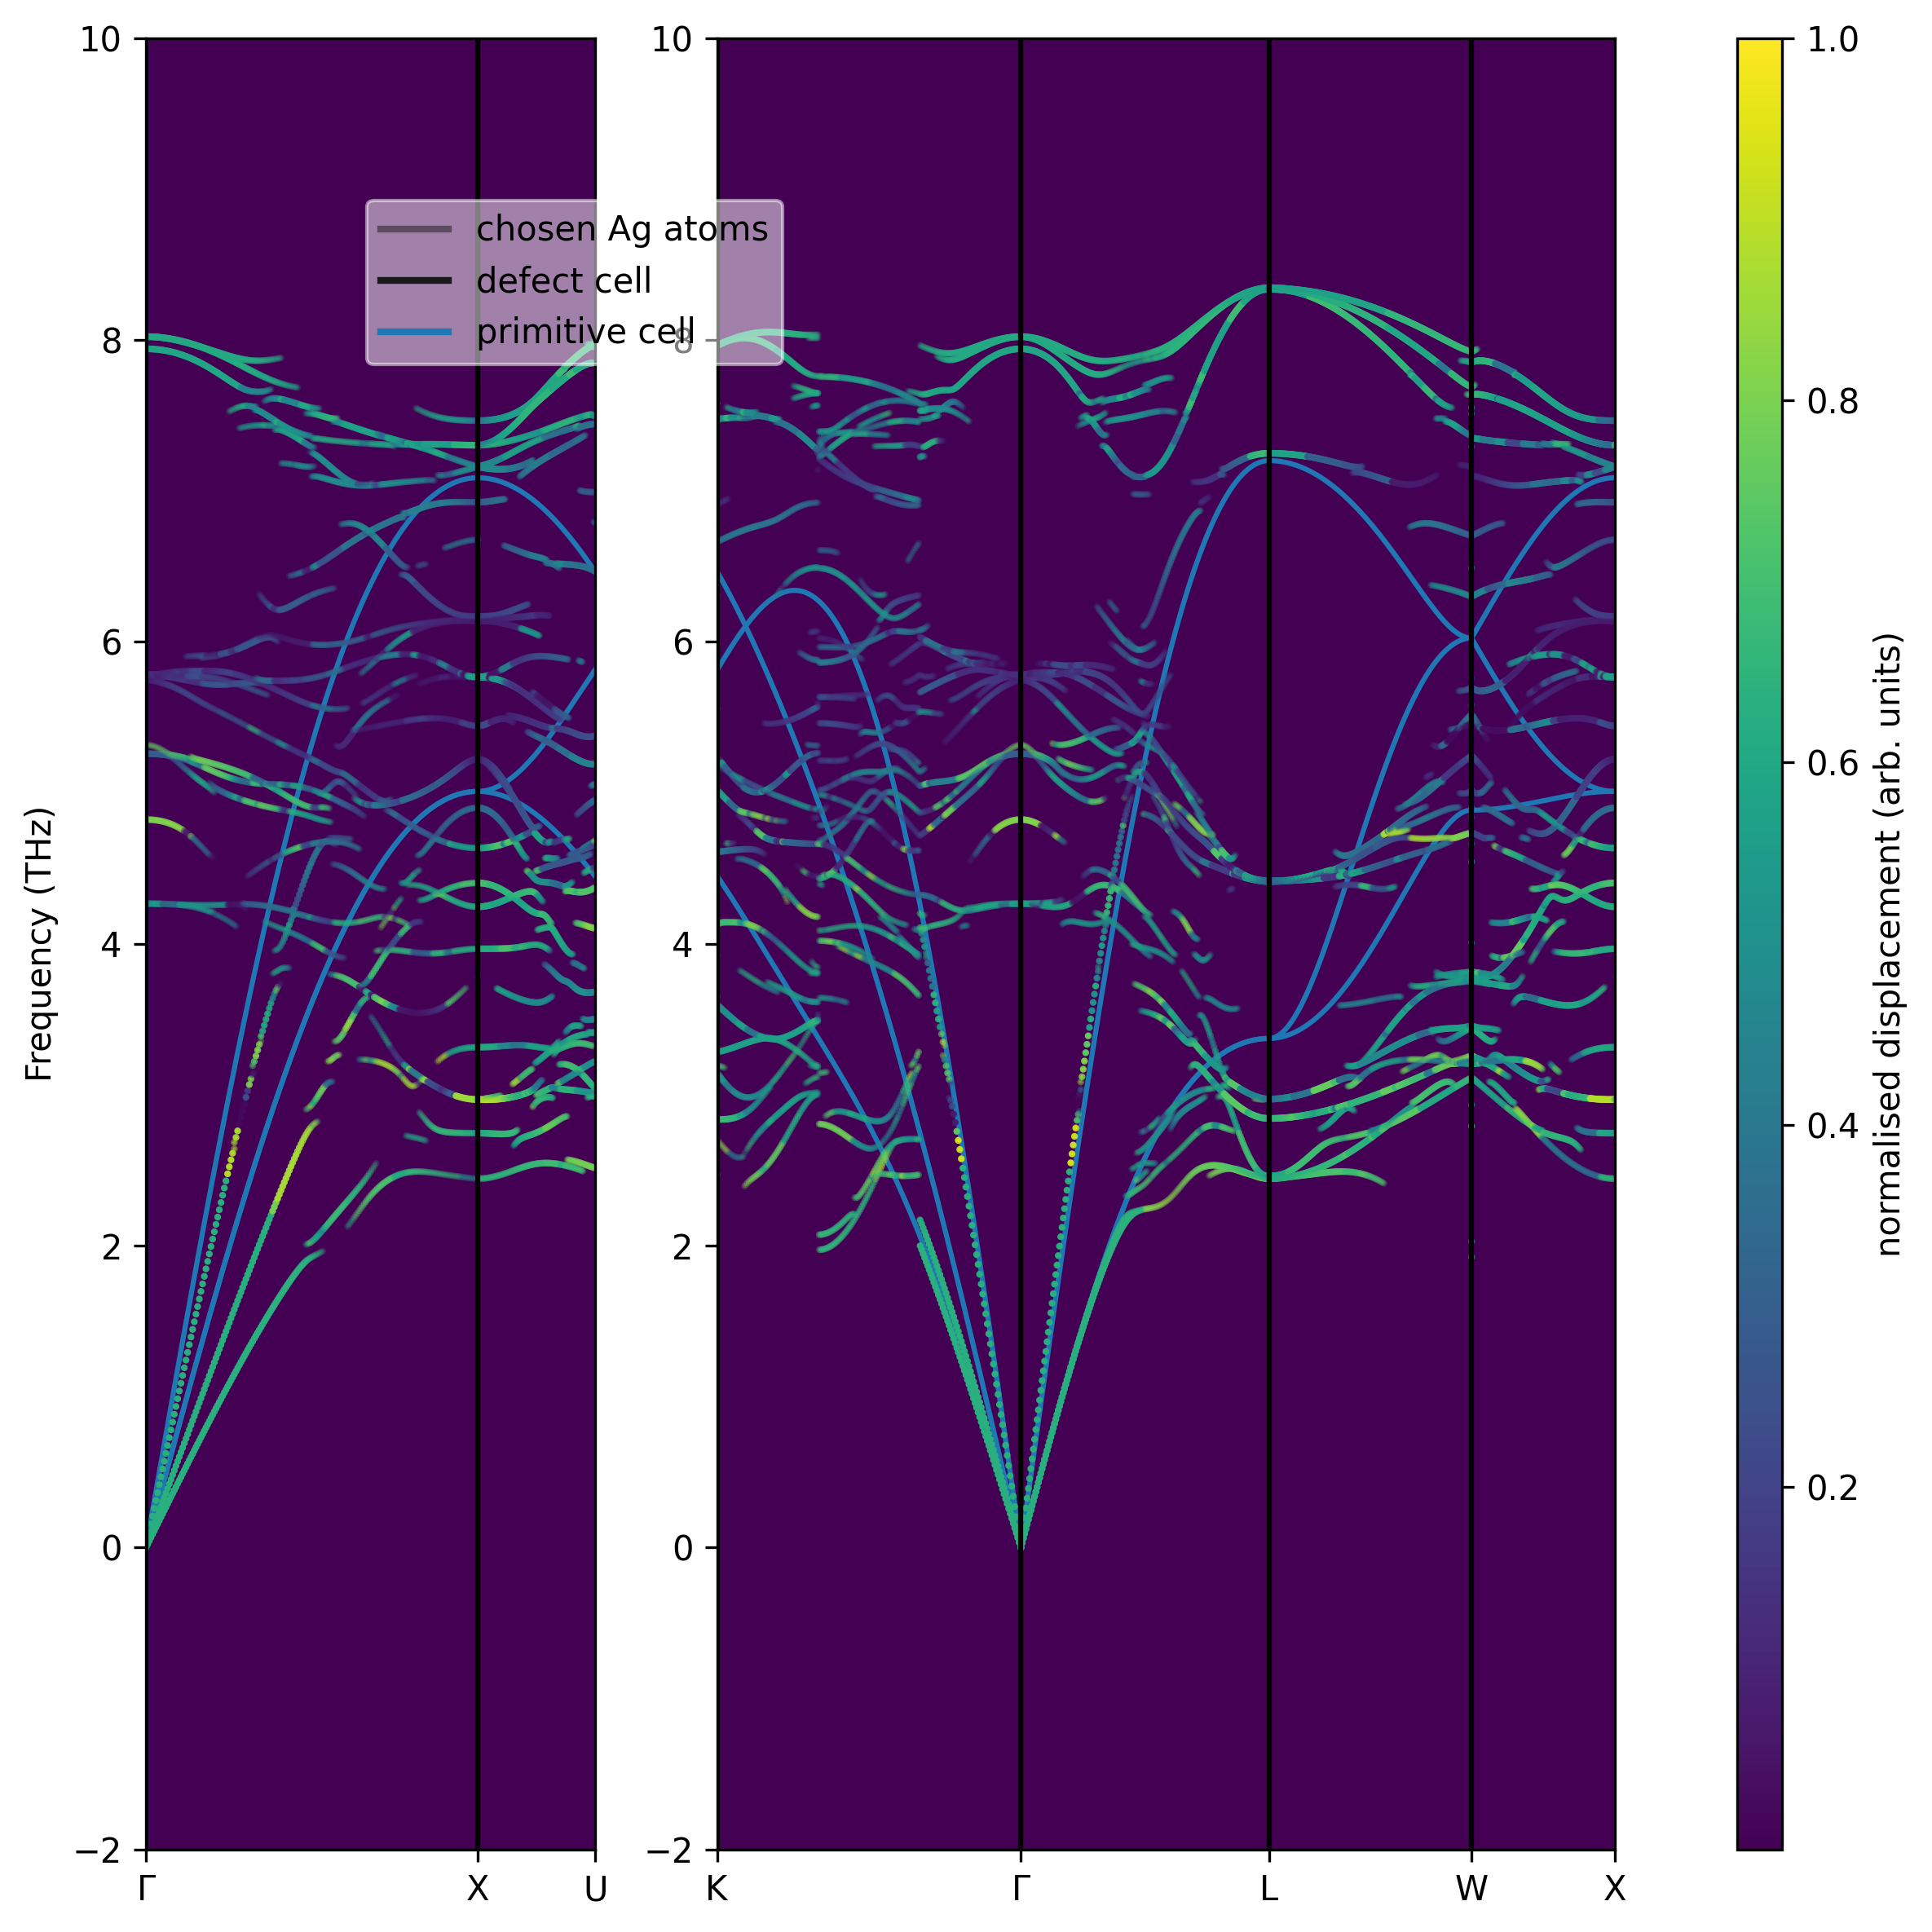

In [432]:
from puppy.plotting import PuppyPlotter 
import matplotlib as mpl 
mpl.rcParams['pdf.fonttype'] = 42

cmap = 'viridis'
comap = mpl.colormaps.get_cmap(cmap)

mpl.rcParams["axes.facecolor"] = comap.colors[0]

plot_kws={'s':1,'rasterized':True,'edgecolor':None,'linewidths':None}

legend_kws={'facecolor':'white',
                        'framealpha':0.5,
                        'edgecolor':'white',
                        'bbox_to_anchor':[0.3,0.9],
                        'loc':'upper center'}

pp =  PuppyPlotter(unfold_data=puppy.unfold_data)

fig,axes = pp.plot_unfold(
    cmap=cmap,
    atom='Ag',
    with_prim=True,
    threshold=0.2,
    plot_kws=plot_kws,
    legend_kws=legend_kws
)

In [433]:
from phonopy.unfolding.core import Unfolding

In [434]:
from phonopy.interface.vasp import read_vasp

POSCAR_ideal = read_vasp('./CuAg/host/SPOSCAR')

mapping = [i for i in range(len(POSCAR_ideal.scaled_positions))]

Supercell structure was read from "./CuAg/host/SPOSCAR".
Force constants were read from "./CuAg/host/FORCE_CONSTANTS".
Force constants format was transformed to compact format.


<module 'matplotlib.pyplot' from '/Users/badw/miniconda3/envs/py312/lib/python3.12/site-packages/matplotlib/pyplot.py'>

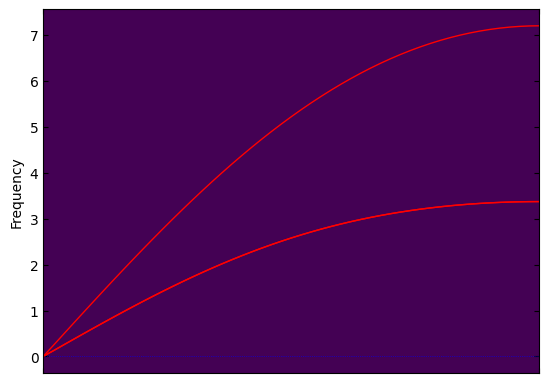

In [435]:
import phonopy 
from phonopy.phonon.band_structure import get_band_qpoints 

host_phonons = phonopy.load(supercell_filename='./CuAg/host/SPOSCAR',
                            force_constants_filename='./CuAg/host/FORCE_CONSTANTS',
                            log_level=2,
                            supercell_matrix=[[2,0,0],[0,2,0],[0,0,2]],
                            primitive_matrix='auto'
                            )

#host_phonons.auto_band_structure()
qpoints = get_band_qpoints(band_paths=[[[0,0,0],[0,0,0.5]]],
                         npoints = 51)
host_phonons.run_band_structure(qpoints)
host_phonons.plot_band_structure()

In [436]:
import phonopy 
from phonopy.phonon.band_structure import get_band_qpoints 
from puppy.file_io import file_unzip

supercell_phonons = phonopy.load(
                supercell_filename='./CuAg/solid_solution/SPOSCAR',
                force_constants_filename='./CuAg/solid_solution/FORCE_CONSTANTS',
                log_level=0,
                primitive_matrix='auto',
                supercell_matrix=[[1,0,0],[0,1,0],[0,0,1]]
            )

<module 'matplotlib.pyplot' from '/Users/badw/miniconda3/envs/py312/lib/python3.12/site-packages/matplotlib/pyplot.py'>

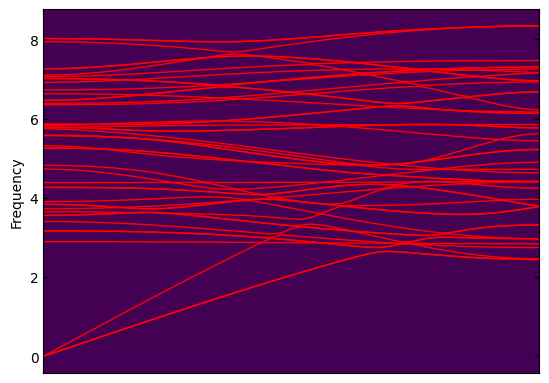

In [437]:
supercell_phonons.run_band_structure(qpoints)
supercell_phonons.plot_band_structure()

In [443]:
unfold = Unfolding(
    phonon = puppy.defect_phonons, # defect phonons
    supercell_matrix = [[2,0,0],[0,2,0],[0,0,2]], # supercell matrix 
    ideal_positions = POSCAR_ideal.scaled_positions,
    atom_mapping = [i for i in range(len(POSCAR_ideal.scaled_positions))], # should be better...
    qpoints = qpoints[0],
)

unfold.run()

np.shape(unfold.unfolding_weights)


(51, 96)

In [444]:
weights = unfold.unfolding_weights
frequencies = unfold.frequencies

In [445]:
np.shape(distances),np.shape(frequencies.T[0::3].T),np.shape(weights.T[0::3].T)

((51,), (51, 32), (51, 32))

In [446]:
_list = [0,1,2,3,4,5,6,7,8,9]

_list[1::3]

[1, 4, 7]

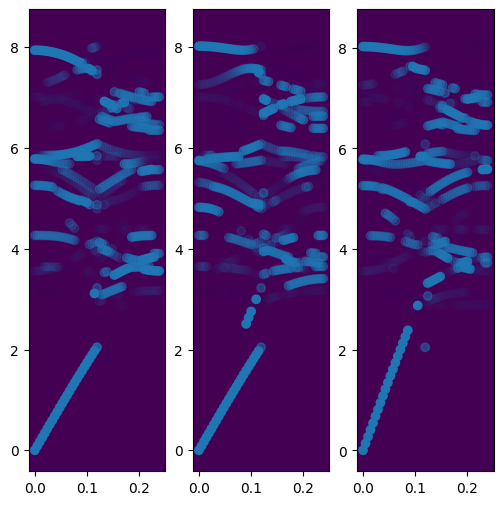

In [447]:
import matplotlib.pyplot as plt 
distances = _dict['distances'][0]
fig,axes = plt.subplots(ncols=3,figsize=(6,6),dpi=100)
for wt,f in zip(weights.T[0::3],frequencies.T[0::3]):
    axes[0].scatter(distances,f,c='tab:blue',alpha=wt)

for wt,f in zip(weights.T[1::3],frequencies.T[1::3]):
    axes[1].scatter(distances,f,c='tab:blue',alpha=wt)

for wt,f in zip(weights.T[2::3],frequencies.T[2::3]):
    axes[2].scatter(distances,f,c='tab:blue',alpha=wt)